# Exploratory Data Analysis - Parking Patterns and Insights

**Purpose:** Deep dive into parking patterns to identify:
- Peak usage hours and days
- High-demand zones and lots
- Calendar event impacts (games, finals, breaks)
- Weather effects on parking behavior
- Seasonal patterns
- Correlations between features

**This analysis informs:**
- Feature engineering decisions
- Model selection
- Prediction targets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully")

Libraries loaded successfully


## Load Final Datasets

In [2]:
# Load AMP final data
print("Loading AMP final dataset...")
amp = pd.read_csv('../data/processed/amp_final.csv')
amp['Start_Date'] = pd.to_datetime(amp['Start_Date'])
amp['End_Date'] = pd.to_datetime(amp['End_Date'])

print(f"\nAMP Dataset Loaded:")
print(f"  Records: {len(amp):,}")
print(f"  Columns: {len(amp.columns)}")
print(f"  Date Range: {amp['Start_Date'].min().date()} to {amp['End_Date'].max().date()}")
print(f"  Memory: {amp.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Show column categories
print(f"\nColumn Categories:")
print(f"  Temporal: year, month, day, hour, day_of_week, is_weekend, time_of_day, semester")
print(f"  Calendar: is_game_day, is_finals_week, is_spring_break, etc.")
print(f"  Weather: temp_mean_f, precipitation_inches, is_rainy, is_snowy, etc.")
print(f"  Location: Zone")

Loading AMP final dataset...

AMP Dataset Loaded:
  Records: 1,702,867
  Columns: 41
  Date Range: 2020-08-10 to 2025-11-02
  Memory: 1011.7 MB

Column Categories:
  Temporal: year, month, day, hour, day_of_week, is_weekend, time_of_day, semester
  Calendar: is_game_day, is_finals_week, is_spring_break, etc.
  Weather: temp_mean_f, precipitation_inches, is_rainy, is_snowy, etc.
  Location: Zone


## Dataset Overview and Statistics

In [3]:
print("="*70)
print("DATASET OVERVIEW")
print("="*70)

# Basic statistics
print(f"\nTotal parking sessions: {len(amp):,}")
print(f"Unique zones: {amp['Zone'].nunique()}")
print(f"Date span: {(amp['Start_Date'].max() - amp['Start_Date'].min()).days} days")

# Sessions by year
print(f"\nSessions by Year:")
year_counts = amp['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"  {year}: {count:>8,} sessions ({count/len(amp)*100:>5.2f}%)")

# Sessions by semester
print(f"\nTop 10 Semesters by Activity:")
semester_counts = amp['semester'].value_counts().head(10)
for semester, count in semester_counts.items():
    print(f"  {semester:20s}: {count:>8,} sessions")

DATASET OVERVIEW

Total parking sessions: 1,702,867
Unique zones: 63
Date span: 1908 days

Sessions by Year:
  2020:   10,518 sessions ( 0.62%)
  2021:  103,592 sessions ( 6.08%)
  2022:  260,437 sessions (15.29%)
  2023:  443,806 sessions (26.06%)
  2024:  481,892 sessions (28.30%)
  2025:  402,622 sessions (23.64%)

Top 10 Semesters by Activity:
  Spring 2025         :  240,084 sessions
  Spring 2024         :  235,645 sessions
  Fall 2024           :  221,559 sessions
  Fall 2023           :  219,145 sessions
  Spring 2023         :  203,690 sessions
  Fall 2022           :  138,616 sessions
  Fall 2025           :  138,565 sessions
  Spring 2022         :  109,230 sessions
  Fall 2021           :   76,206 sessions
  Summer 2024         :   24,688 sessions


## Temporal Patterns - When Do People Park?

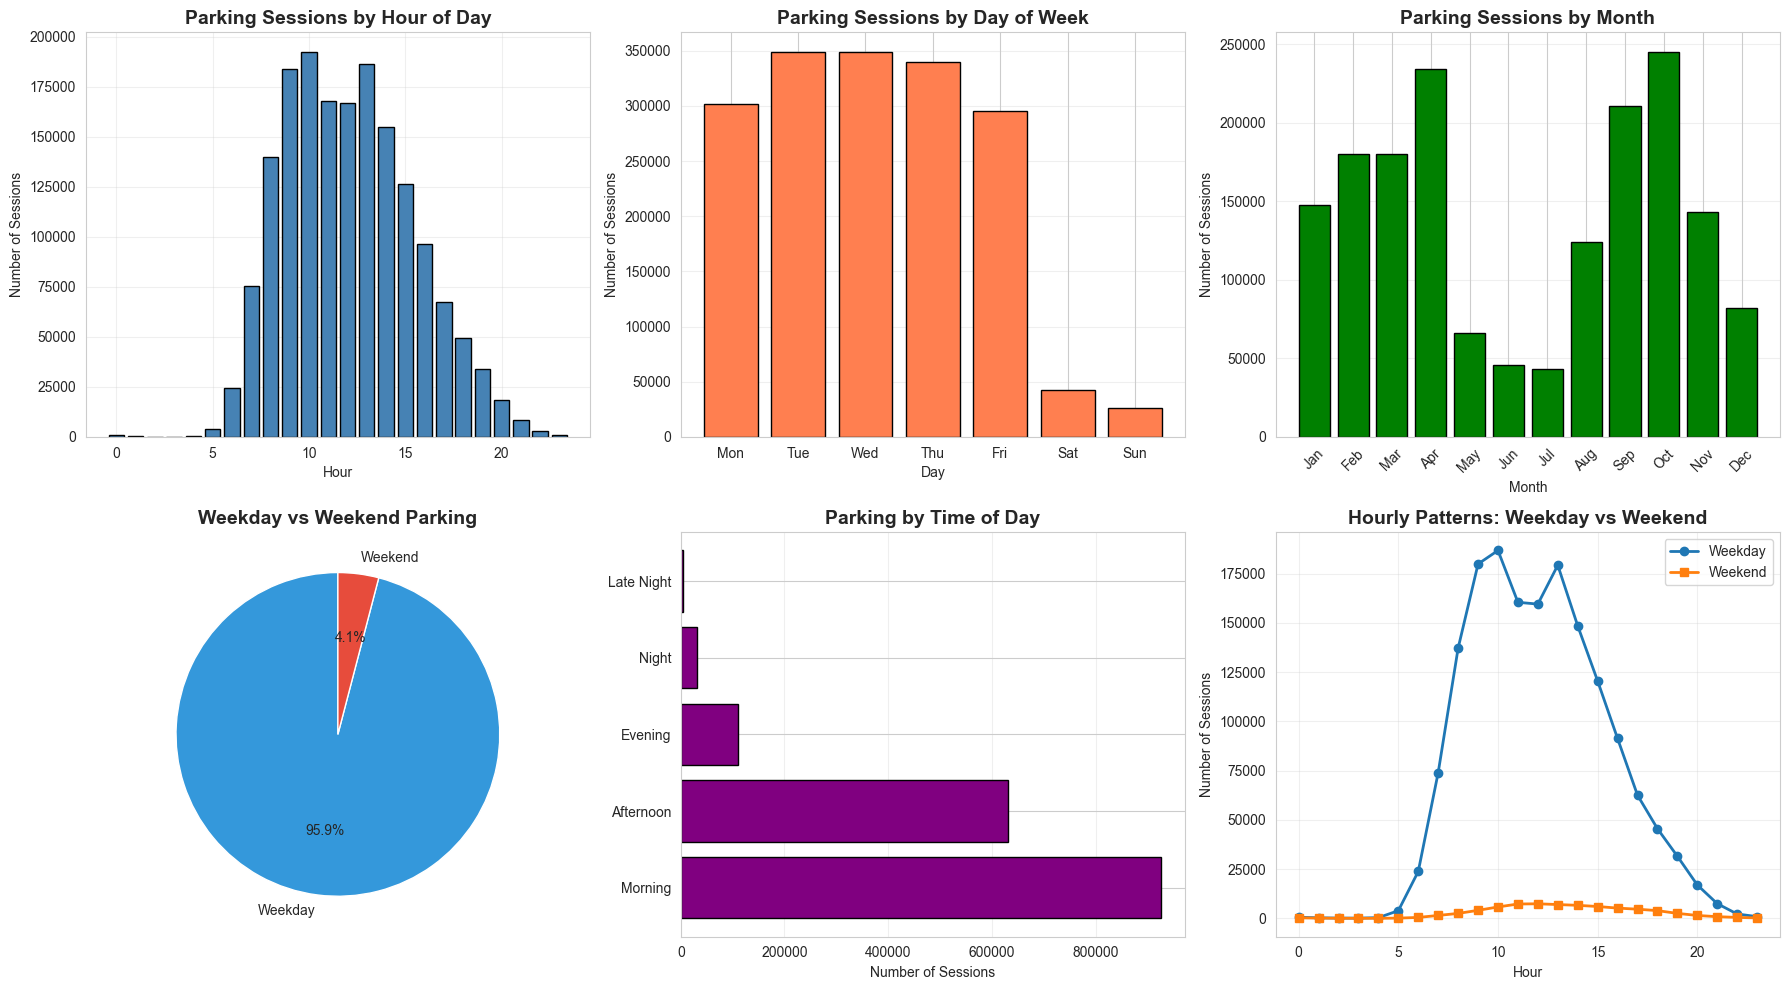


Key Temporal Insights:
  Peak hour: 10:00 (192,517 sessions)
  Busiest day: Wed (349,188 sessions)
  Busiest month: Oct (245,312 sessions)
  Weekday sessions: 1,633,676 (95.9%)
  Weekend sessions: 69,191 (4.1%)


In [4]:
# Create comprehensive temporal analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Hourly distribution
hourly = amp.groupby('hour').size()
axes[0, 0].bar(hourly.index, hourly.values, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Parking Sessions by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Number of Sessions')
axes[0, 0].grid(True, alpha=0.3)

# 2. Day of week distribution
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow = amp['day_of_week'].value_counts().sort_index()
axes[0, 1].bar(range(7), dow.values, color='coral', edgecolor='black')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names)
axes[0, 1].set_title('Parking Sessions by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Number of Sessions')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Monthly distribution
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly = amp['month'].value_counts().sort_index()
axes[0, 2].bar(monthly.index, monthly.values, color='green', edgecolor='black')
axes[0, 2].set_xticks(range(1, 13))
axes[0, 2].set_xticklabels(month_names, rotation=45)
axes[0, 2].set_title('Parking Sessions by Month', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Month')
axes[0, 2].set_ylabel('Number of Sessions')
axes[0, 2].grid(True, alpha=0.3, axis='y')

# 4. Weekend vs Weekday
weekend_data = amp['is_weekend'].value_counts()
labels = ['Weekday', 'Weekend']
colors = ['#3498db', '#e74c3c']
axes[1, 0].pie(weekend_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('Weekday vs Weekend Parking', fontsize=14, fontweight='bold')

# 5. Time of day distribution
time_dist = amp['time_of_day'].value_counts()
axes[1, 1].barh(time_dist.index, time_dist.values, color='purple', edgecolor='black')
axes[1, 1].set_title('Parking by Time of Day', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Sessions')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# 6. Hourly pattern: Weekday vs Weekend
weekday_hourly = amp[amp['is_weekend'] == 0].groupby('hour').size()
weekend_hourly = amp[amp['is_weekend'] == 1].groupby('hour').size()
axes[1, 2].plot(weekday_hourly.index, weekday_hourly.values, marker='o', label='Weekday', linewidth=2)
axes[1, 2].plot(weekend_hourly.index, weekend_hourly.values, marker='s', label='Weekend', linewidth=2)
axes[1, 2].set_title('Hourly Patterns: Weekday vs Weekend', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Hour')
axes[1, 2].set_ylabel('Number of Sessions')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/eda_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Temporal Insights:")
print(f"  Peak hour: {hourly.idxmax()}:00 ({hourly.max():,} sessions)")
print(f"  Busiest day: {day_names[dow.idxmax()]} ({dow.max():,} sessions)")
print(f"  Busiest month: {month_names[monthly.idxmax()-1]} ({monthly.max():,} sessions)")
print(f"  Weekday sessions: {weekend_data[0]:,} ({weekend_data[0]/len(amp)*100:.1f}%)")
print(f"  Weekend sessions: {weekend_data[1]:,} ({weekend_data[1]/len(amp)*100:.1f}%)")

## Zone Analysis - Where Do People Park?

ZONE USAGE ANALYSIS

Top 20 Most Popular Zones:
   1. CUE Garage                    :  399,151 sessions (23.44%)
   2. Library Garage                :  291,173 sessions (17.10%)
   3. Student Rec Center            :  247,802 sessions (14.55%)
   4. Columbia Street Lot Top Bays  :  135,279 sessions ( 7.94%)
   5. Green 5 South Beasley         :  104,820 sessions ( 6.16%)
   6. Wilson Road on Street Meters  :   88,960 sessions ( 5.22%)
   7. Cougar Way on Street Meters   :   50,527 sessions ( 2.97%)
   8. Ferdinand's Ice Cream Shoppe Parking:   35,275 sessions ( 2.07%)
   9. Green 1 PACCAR South          :   30,520 sessions ( 1.79%)
  10. Green 3: (Gravel lot) College/Spokane:   27,784 sessions ( 1.63%)
  11. Green 2 KMac Lot              :   27,357 sessions ( 1.61%)
  12. Green 3: Washington St street-side & Spark:   24,397 sessions ( 1.43%)
  13. Thatuna Rd. on Street Meters  :   23,046 sessions ( 1.35%)
  14. B St Hourly Lot               :   19,849 sessions ( 1.17%)
  15. Cougar Heal

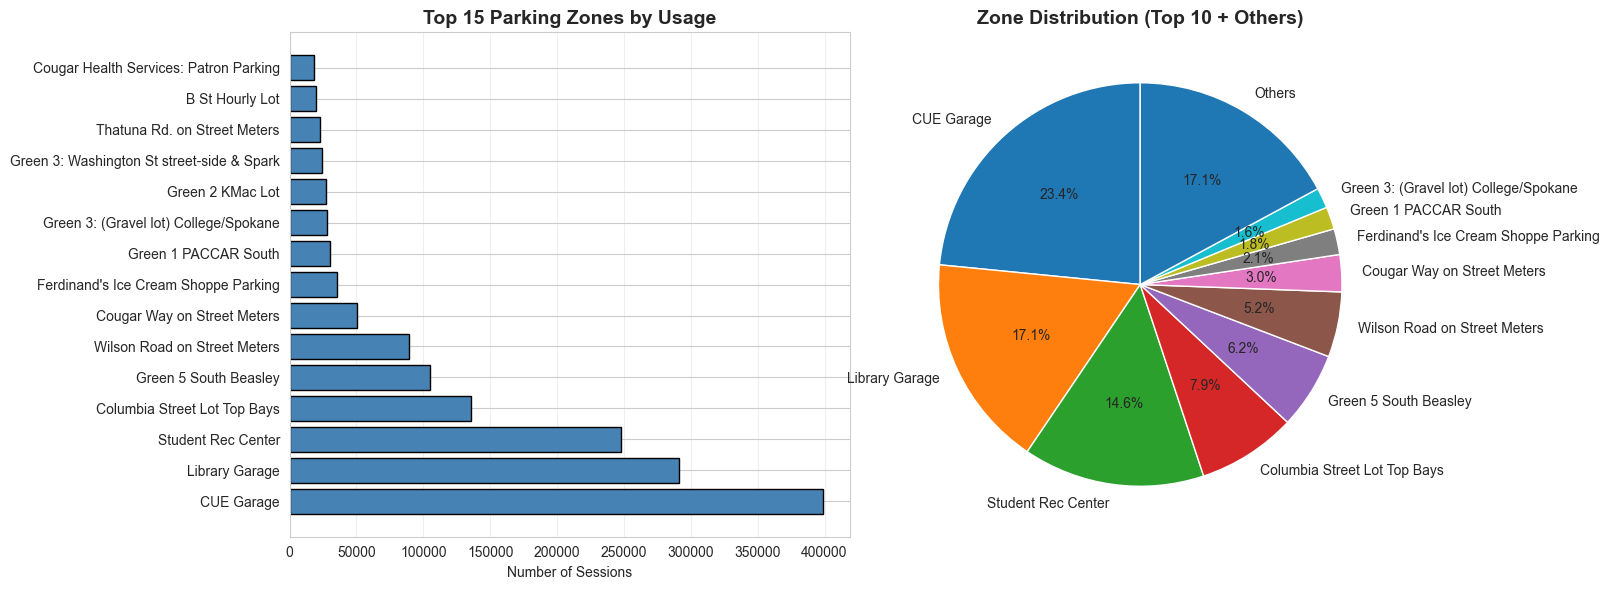

In [5]:
# Top zones by usage
print("="*70)
print("ZONE USAGE ANALYSIS")
print("="*70)

zone_counts = amp['Zone'].value_counts()
print(f"\nTop 20 Most Popular Zones:")
for i, (zone, count) in enumerate(zone_counts.head(20).items(), 1):
    pct = count / len(amp) * 100
    print(f"  {i:2d}. {zone:30s}: {count:>8,} sessions ({pct:>5.2f}%)")

# Visualize top zones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 zones
top_zones = zone_counts.head(15)
axes[0].barh(range(len(top_zones)), top_zones.values, color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_zones)))
axes[0].set_yticklabels(top_zones.index)
axes[0].set_xlabel('Number of Sessions')
axes[0].set_title('Top 15 Parking Zones by Usage', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Zone distribution pie chart (top 10 + others)
top_10_zones = zone_counts.head(10)
others = zone_counts[10:].sum()
pie_data = list(top_10_zones.values) + [others]
pie_labels = list(top_10_zones.index) + ['Others']
axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Zone Distribution (Top 10 + Others)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/eda_zone_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Calendar Event Impact Analysis

CALENDAR EVENT IMPACT

Football Game Days:
  Game days:    697 sessions/day
  Regular days:    911 sessions/day
  Impact:  -23.5%

Finals Week:
  Finals week:  1,080 sessions/day
  Regular weeks:    903 sessions/day
  Impact:  +19.6%

Break Periods:
  Break periods:    191 sessions/day
  Regular periods:  1,018 sessions/day
  Impact:  -81.2%


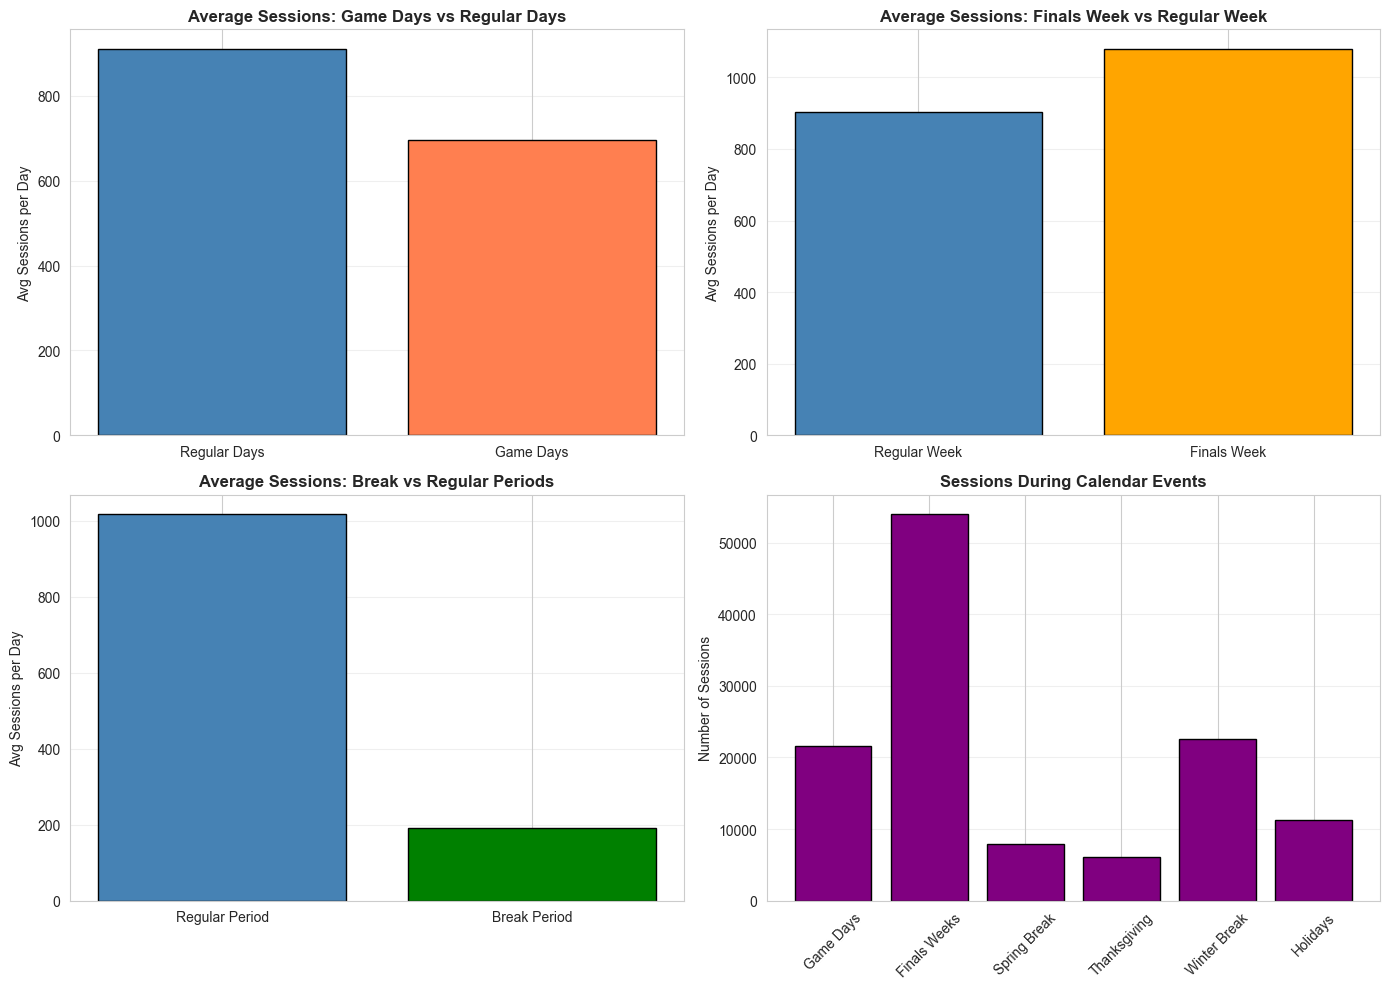

In [6]:
print("="*70)
print("CALENDAR EVENT IMPACT")
print("="*70)

# Calculate average sessions per day for each condition
def avg_sessions_per_day(condition_col, condition_value):
    """Calculate average sessions per day for a given condition"""
    data = amp[amp[condition_col] == condition_value]
    if len(data) == 0:
        return 0
    return data.groupby(data['Start_Date'].dt.date).size().mean()

# Game days impact
print(f"\nFootball Game Days:")
game_day_avg = avg_sessions_per_day('is_game_day', 1)
regular_day_avg = avg_sessions_per_day('is_game_day', 0)
print(f"  Game days: {game_day_avg:>6,.0f} sessions/day")
print(f"  Regular days: {regular_day_avg:>6,.0f} sessions/day")
print(f"  Impact: {(game_day_avg/regular_day_avg - 1)*100:>+6.1f}%")

# Finals week impact
print(f"\nFinals Week:")
finals_avg = avg_sessions_per_day('is_finals_week', 1)
non_finals_avg = avg_sessions_per_day('is_finals_week', 0)
print(f"  Finals week: {finals_avg:>6,.0f} sessions/day")
print(f"  Regular weeks: {non_finals_avg:>6,.0f} sessions/day")
print(f"  Impact: {(finals_avg/non_finals_avg - 1)*100:>+6.1f}%")

# Break periods impact
print(f"\nBreak Periods:")
break_avg = avg_sessions_per_day('is_any_break', 1)
non_break_avg = avg_sessions_per_day('is_any_break', 0)
print(f"  Break periods: {break_avg:>6,.0f} sessions/day")
print(f"  Regular periods: {non_break_avg:>6,.0f} sessions/day")
print(f"  Impact: {(break_avg/non_break_avg - 1)*100:>+6.1f}%")

# Visualize calendar impacts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Game day comparison
game_data = [regular_day_avg, game_day_avg]
axes[0, 0].bar(['Regular Days', 'Game Days'], game_data, color=['steelblue', 'coral'], edgecolor='black')
axes[0, 0].set_title('Average Sessions: Game Days vs Regular Days', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Avg Sessions per Day')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Finals week comparison
finals_data = [non_finals_avg, finals_avg]
axes[0, 1].bar(['Regular Week', 'Finals Week'], finals_data, color=['steelblue', 'orange'], edgecolor='black')
axes[0, 1].set_title('Average Sessions: Finals Week vs Regular Week', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Avg Sessions per Day')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Break periods comparison
break_data = [non_break_avg, break_avg]
axes[1, 0].bar(['Regular Period', 'Break Period'], break_data, color=['steelblue', 'green'], edgecolor='black')
axes[1, 0].set_title('Average Sessions: Break vs Regular Periods', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Avg Sessions per Day')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Calendar event distribution
event_counts = {
    'Game Days': amp['is_game_day'].sum(),
    'Finals Weeks': amp['is_finals_week'].sum(),
    'Spring Break': amp['is_spring_break'].sum(),
    'Thanksgiving': amp['is_thanksgiving_break'].sum(),
    'Winter Break': amp['is_winter_break'].sum(),
    'Holidays': amp['is_university_holiday'].sum()
}
axes[1, 1].bar(event_counts.keys(), event_counts.values(), color='purple', edgecolor='black')
axes[1, 1].set_title('Sessions During Calendar Events', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Sessions')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/eda_calendar_impact.png', dpi=300, bbox_inches='tight')
plt.show()

## Weather Impact Analysis

WEATHER IMPACT ANALYSIS

Weather Condition Impacts (Avg Sessions/Day):
  is_rainy       : Yes=   964, No=   894 (Impact:   +7.8%)
  is_snowy       : Yes=   989, No=   895 (Impact:  +10.6%)
  is_cold        : Yes= 1,034, No=   891 (Impact:  +16.1%)
  is_hot         : Yes=   471, No=   926 (Impact:  -49.2%)
  is_severe      : Yes=   752, No=   912 (Impact:  -17.5%)

Temperature Impact:
  <20°F     :  1,181 sessions/day
  20-40°F   :    991 sessions/day
  40-60°F   :  1,090 sessions/day
  60-80°F   :    660 sessions/day
  >80°F     :    471 sessions/day


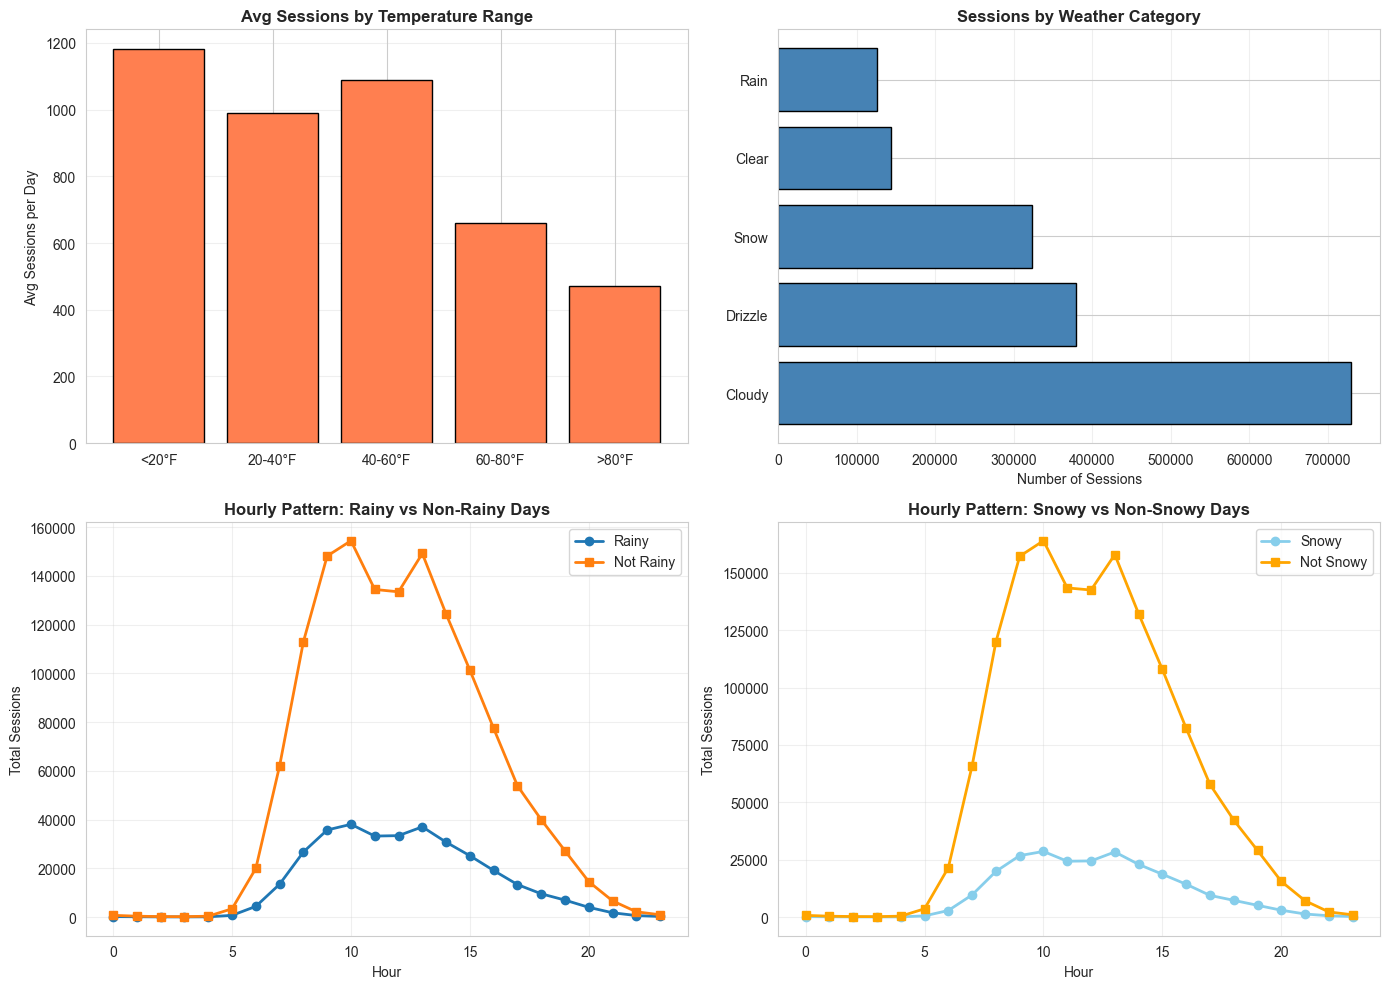

In [7]:
print("="*70)
print("WEATHER IMPACT ANALYSIS")
print("="*70)

# Weather condition impacts
print(f"\nWeather Condition Impacts (Avg Sessions/Day):")
weather_conditions = ['is_rainy', 'is_snowy', 'is_cold', 'is_hot', 'is_severe']
for condition in weather_conditions:
    yes_avg = avg_sessions_per_day(condition, 1)
    no_avg = avg_sessions_per_day(condition, 0)
    if yes_avg > 0:
        impact = (yes_avg / no_avg - 1) * 100
        print(f"  {condition:15s}: Yes={yes_avg:>6,.0f}, No={no_avg:>6,.0f} (Impact: {impact:>+6.1f}%)")

# Temperature impact
print(f"\nTemperature Impact:")
temp_bins = pd.cut(amp['temp_mean_f'], bins=[-20, 20, 40, 60, 80, 100], 
                    labels=['<20°F', '20-40°F', '40-60°F', '60-80°F', '>80°F'])
temp_avg = amp.groupby(temp_bins).apply(lambda x: x.groupby(x['Start_Date'].dt.date).size().mean())
for temp_range, avg in temp_avg.items():
    print(f"  {temp_range:10s}: {avg:>6,.0f} sessions/day")

# Visualize weather impacts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Temperature impact
axes[0, 0].bar(range(len(temp_avg)), temp_avg.values, color='coral', edgecolor='black')
axes[0, 0].set_xticks(range(len(temp_avg)))
axes[0, 0].set_xticklabels(temp_avg.index)
axes[0, 0].set_title('Avg Sessions by Temperature Range', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Avg Sessions per Day')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Weather category distribution
weather_cat = amp['weather_category'].value_counts()
axes[0, 1].barh(weather_cat.index, weather_cat.values, color='steelblue', edgecolor='black')
axes[0, 1].set_title('Sessions by Weather Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Sessions')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Rainy vs Non-rainy hourly
rainy_hourly = amp[amp['is_rainy'] == 1].groupby('hour').size()
not_rainy_hourly = amp[amp['is_rainy'] == 0].groupby('hour').size()
axes[1, 0].plot(rainy_hourly.index, rainy_hourly.values, marker='o', label='Rainy', linewidth=2)
axes[1, 0].plot(not_rainy_hourly.index, not_rainy_hourly.values, marker='s', label='Not Rainy', linewidth=2)
axes[1, 0].set_title('Hourly Pattern: Rainy vs Non-Rainy Days', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Total Sessions')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Snowy vs Non-snowy hourly
snowy_hourly = amp[amp['is_snowy'] == 1].groupby('hour').size()
not_snowy_hourly = amp[amp['is_snowy'] == 0].groupby('hour').size()
axes[1, 1].plot(snowy_hourly.index, snowy_hourly.values, marker='o', label='Snowy', linewidth=2, color='skyblue')
axes[1, 1].plot(not_snowy_hourly.index, not_snowy_hourly.values, marker='s', label='Not Snowy', linewidth=2, color='orange')
axes[1, 1].set_title('Hourly Pattern: Snowy vs Non-Snowy Days', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Total Sessions')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/eda_weather_impact.png', dpi=300, bbox_inches='tight')
plt.show()

## Parking Duration Analysis

PARKING DURATION ANALYSIS

Duration Statistics (hours):
  Mean: 2.13
  Median: 1.50
  Std Dev: 2.20
  Min: 0.02
  Max: 167.93

Average Duration by Time of Day:
  Late Night     : 4.08 hours
  Night          : 2.96 hours
  Morning        : 2.52 hours
  Evening        : 1.70 hours
  Afternoon      : 1.57 hours


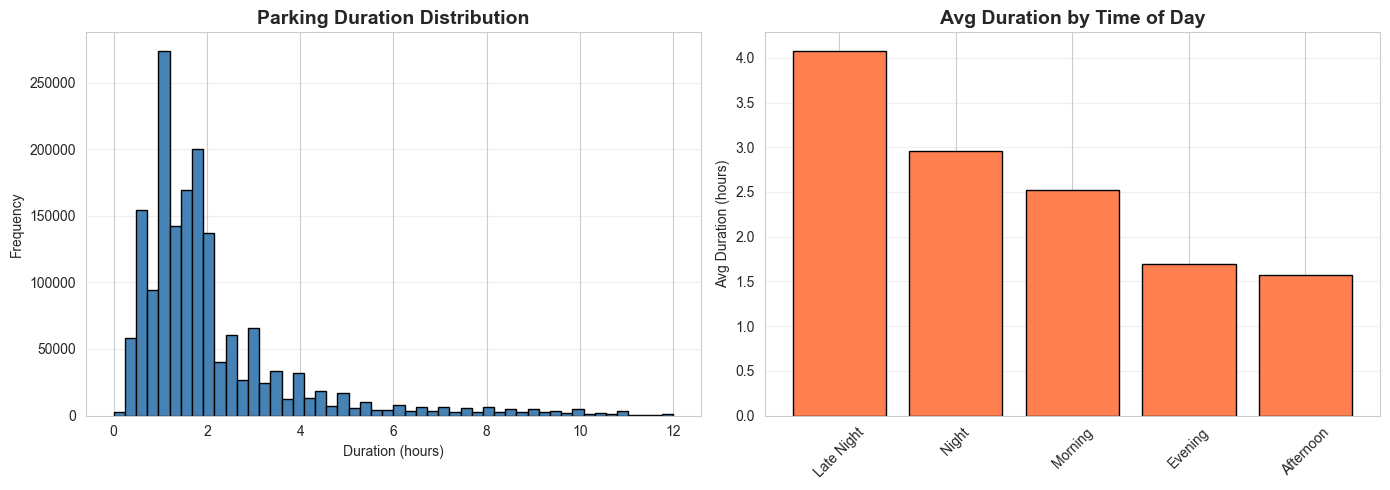

In [8]:
print("="*70)
print("PARKING DURATION ANALYSIS")
print("="*70)

# Duration statistics
print(f"\nDuration Statistics (hours):")
print(f"  Mean: {amp['duration_hours'].mean():.2f}")
print(f"  Median: {amp['duration_hours'].median():.2f}")
print(f"  Std Dev: {amp['duration_hours'].std():.2f}")
print(f"  Min: {amp['duration_hours'].min():.2f}")
print(f"  Max: {amp['duration_hours'].max():.2f}")

# Duration by time of day
print(f"\nAverage Duration by Time of Day:")
duration_by_time = amp.groupby('time_of_day')['duration_hours'].mean().sort_values(ascending=False)
for time, dur in duration_by_time.items():
    print(f"  {time:15s}: {dur:.2f} hours")

# Visualize durations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Duration histogram
axes[0].hist(amp['duration_hours'], bins=50, color='steelblue', edgecolor='black', range=(0, 12))
axes[0].set_title('Parking Duration Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (hours)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3, axis='y')

# Duration by time of day
axes[1].bar(duration_by_time.index, duration_by_time.values, color='coral', edgecolor='black')
axes[1].set_title('Avg Duration by Time of Day', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Avg Duration (hours)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/eda_duration_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Correlations

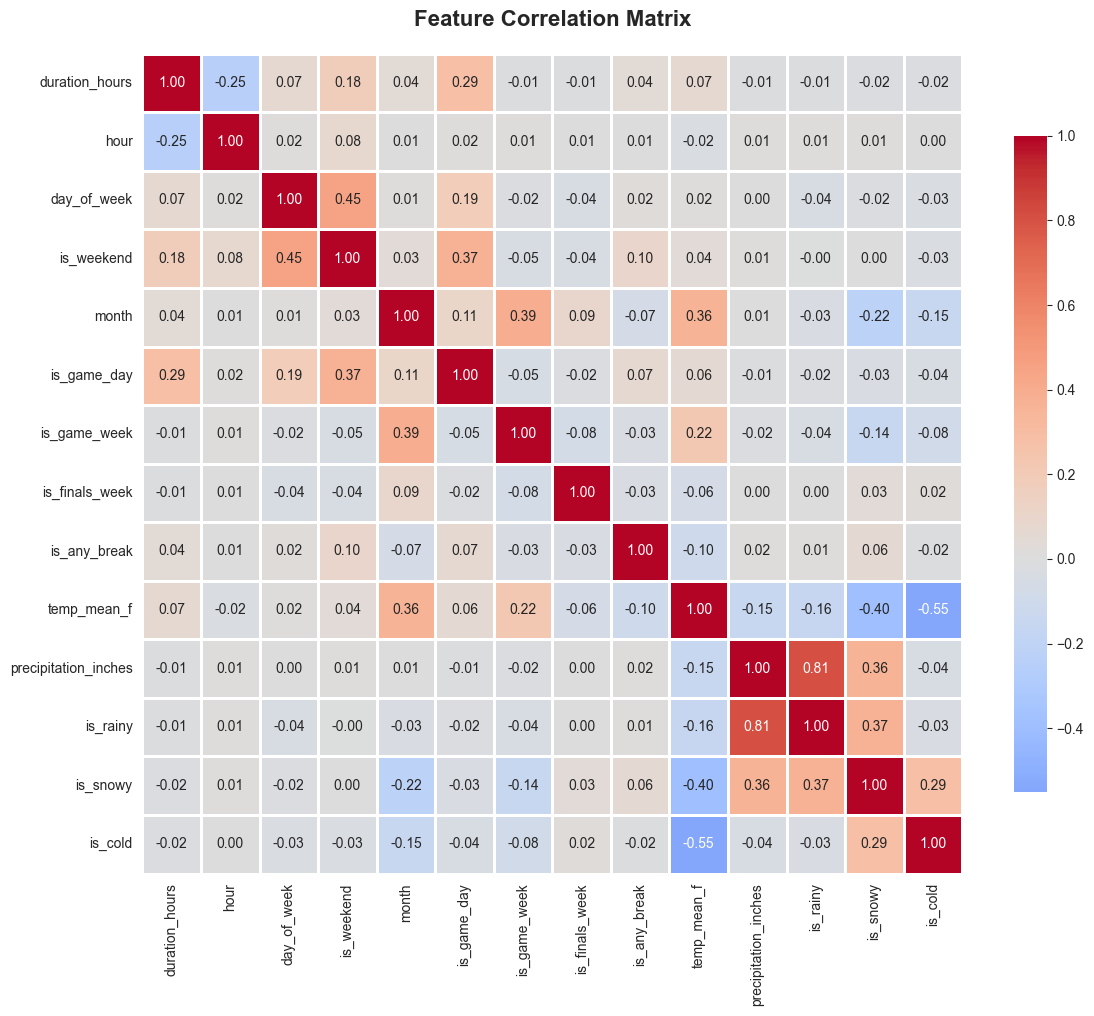


Strongest Correlations with Duration:
  is_game_day              :  0.291
  is_weekend               :  0.182
  day_of_week              :  0.071
  temp_mean_f              :  0.067
  month                    :  0.040
  is_any_break             :  0.039
  is_finals_week           : -0.006
  precipitation_inches     : -0.008
  is_rainy                 : -0.014
  is_game_week             : -0.015
  is_snowy                 : -0.018
  is_cold                  : -0.021
  hour                     : -0.248


In [9]:
# Select numeric features for correlation analysis
numeric_features = [
    'duration_hours', 'hour', 'day_of_week', 'is_weekend', 'month',
    'is_game_day', 'is_game_week', 'is_finals_week', 'is_any_break',
    'temp_mean_f', 'precipitation_inches', 'is_rainy', 'is_snowy', 'is_cold'
]

# Calculate correlation matrix
corr_data = amp[numeric_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../data/processed/eda_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStrongest Correlations with Duration:")
duration_corr = corr_data['duration_hours'].sort_values(ascending=False)
for feature, corr in duration_corr.items():
    if feature != 'duration_hours':
        print(f"  {feature:25s}: {corr:>6.3f}")

## Key Insights Summary

In [10]:
print("="*70)
print("KEY INSIGHTS FOR MODELING")
print("="*70)

print(f"\n1. TEMPORAL PATTERNS:")
print(f"   - Peak hour: {hourly.idxmax()}:00")
print(f"   - Busiest day: {day_names[dow.idxmax()]}")
print(f"   - Weekend activity: {weekend_data[1]/len(amp)*100:.1f}% of total")

print(f"\n2. HIGH-DEMAND ZONES:")
top_3_zones = zone_counts.head(3)
for i, (zone, count) in enumerate(top_3_zones.items(), 1):
    print(f"   {i}. {zone}: {count:,} sessions ({count/len(amp)*100:.1f}%)")

print(f"\n3. CALENDAR IMPACT:")
print(f"   - Game days: {(game_day_avg/regular_day_avg - 1)*100:+.1f}% change")
print(f"   - Finals week: {(finals_avg/non_finals_avg - 1)*100:+.1f}% change")
print(f"   - Break periods: {(break_avg/non_break_avg - 1)*100:+.1f}% change")

print(f"\n4. WEATHER IMPACT:")
rainy_avg = avg_sessions_per_day('is_rainy', 1)
not_rainy_avg = avg_sessions_per_day('is_rainy', 0)
snowy_avg = avg_sessions_per_day('is_snowy', 1)
not_snowy_avg = avg_sessions_per_day('is_snowy', 0)
print(f"   - Rainy days: {(rainy_avg/not_rainy_avg - 1)*100:+.1f}% change")
print(f"   - Snowy days: {(snowy_avg/not_snowy_avg - 1)*100:+.1f}% change")

print(f"\n5. DURATION INSIGHTS:")
print(f"   - Average: {amp['duration_hours'].mean():.2f} hours")
print(f"   - Median: {amp['duration_hours'].median():.2f} hours")



KEY INSIGHTS FOR MODELING

1. TEMPORAL PATTERNS:
   - Peak hour: 10:00
   - Busiest day: Wed
   - Weekend activity: 4.1% of total

2. HIGH-DEMAND ZONES:
   1. CUE Garage: 399,151 sessions (23.4%)
   2. Library Garage: 291,173 sessions (17.1%)
   3. Student Rec Center: 247,802 sessions (14.6%)

3. CALENDAR IMPACT:
   - Game days: -23.5% change
   - Finals week: +19.6% change
   - Break periods: -81.2% change

4. WEATHER IMPACT:
   - Rainy days: +7.8% change
   - Snowy days: +10.6% change

5. DURATION INSIGHTS:
   - Average: 2.13 hours
   - Median: 1.50 hours


## Save EDA Summary

In [11]:
# Create summary statistics file
summary = {
    'total_sessions': len(amp),
    'date_range': f"{amp['Start_Date'].min().date()} to {amp['End_Date'].max().date()}",
    'peak_hour': int(hourly.idxmax()),
    'busiest_day': day_names[dow.idxmax()],
    'top_zone': zone_counts.index[0],
    'avg_duration_hours': round(amp['duration_hours'].mean(), 2),
    'game_day_impact_pct': round((game_day_avg/regular_day_avg - 1)*100, 1),
    'finals_week_impact_pct': round((finals_avg/non_finals_avg - 1)*100, 1),
    'rainy_day_impact_pct': round((rainy_avg/not_rainy_avg - 1)*100, 1)
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv('../data/processed/eda_summary.csv', index=False)

print("EDA Summary saved: data/processed/eda_summary.csv")
print("\nVisualizations saved:")
print("  - eda_temporal_patterns.png")
print("  - eda_zone_analysis.png")
print("  - eda_calendar_impact.png")
print("  - eda_weather_impact.png")
print("  - eda_duration_analysis.png")
print("  - eda_correlation_matrix.png")

EDA Summary saved: data/processed/eda_summary.csv

Visualizations saved:
  - eda_temporal_patterns.png
  - eda_zone_analysis.png
  - eda_calendar_impact.png
  - eda_weather_impact.png
  - eda_duration_analysis.png
  - eda_correlation_matrix.png
